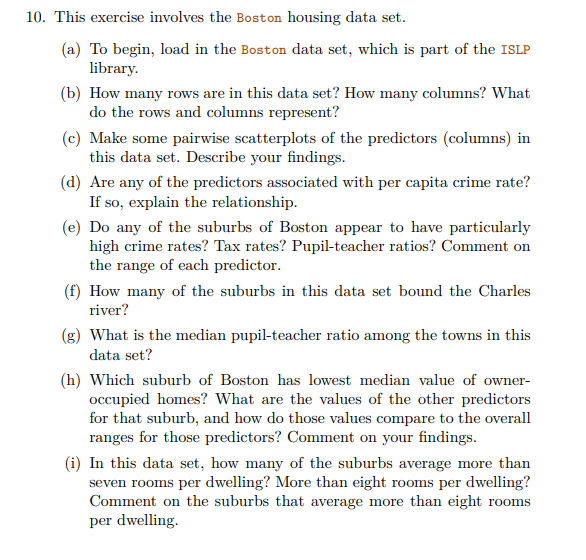

In [11]:
# (a) Load the Boston dataset with column names

import pandas as pd
from google.colab import files

# Upload file from local (Google Colab will prompt)
uploaded = files.upload()

# Read uploaded dataset (space-separated, no header row)
boston = pd.read_csv(next(iter(uploaded)), delim_whitespace=True, header=None)

# Add official Boston dataset column names
boston.columns = [
    "crim", "zn", "indus", "chas", "nox", "rm", "age", "dis",
    "rad", "tax", "ptratio", "b", "lstat", "medv"
]

print(boston.head())
print("Shape:", boston.shape)

Saving housing.csv to housing (3).csv
      crim    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   ptratio       b  lstat  medv  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Shape: (506, 14)


/tmp/ipython-input-1945151473.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  boston = pd.read_csv(next(iter(uploaded)), delim_whitespace=True, header=None)


In [12]:
# (b) Rows and columns
print("Number of rows:", boston.shape[0])
print("Number of columns:", boston.shape[1])

print("\nRows represent suburbs of Boston")
print("Columns represent housing and demographic variables")

Number of rows: 506
Number of columns: 14

Rows represent suburbs of Boston
Columns represent housing and demographic variables


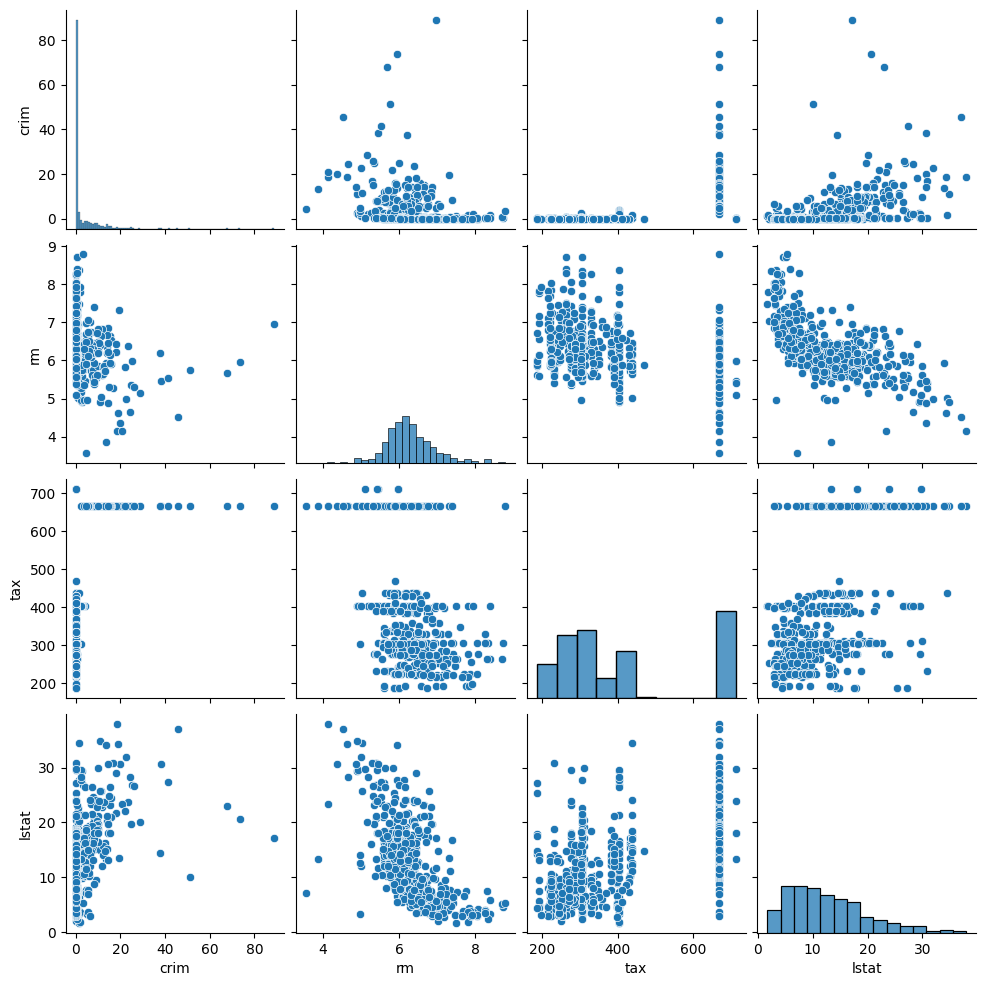

In [13]:
# (c) Pairwise scatterplots of predictors
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(boston[['crim', 'rm', 'tax', 'lstat']])
plt.show()


In [14]:
# (d) Relationship with crime rate
corr_matrix = boston.corr()
print("Correlation of predictors with crime rate:\n")
print(corr_matrix['crim'].sort_values(ascending=False))


Correlation of predictors with crime rate:

crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
b         -0.385064
medv      -0.388305
Name: crim, dtype: float64


In [15]:
# (e) Suburbs with high values
print("Max crime rate:", boston['crim'].max())
print("Max tax rate:", boston['tax'].max())
print("Max pupil-teacher ratio:", boston['ptratio'].max())

print("\nRange of crime rate:", (boston['crim'].min(), boston['crim'].max()))
print("Range of tax rate:", (boston['tax'].min(), boston['tax'].max()))
print("Range of pupil-teacher ratio:", (boston['ptratio'].min(), boston['ptratio'].max()))


Max crime rate: 88.9762
Max tax rate: 711.0
Max pupil-teacher ratio: 22.0

Range of crime rate: (0.00632, 88.9762)
Range of tax rate: (187.0, 711.0)
Range of pupil-teacher ratio: (12.6, 22.0)


In [16]:
# (f) How many suburbs bound the Charles river
print("Number of suburbs next to Charles River:", boston['chas'].sum())


Number of suburbs next to Charles River: 35


In [17]:
# (g) Median pupil-teacher ratio
print("Median pupil-teacher ratio:", boston['ptratio'].median())


Median pupil-teacher ratio: 19.05


In [18]:
# (h) Suburb with lowest housing value
min_medv_idx = boston['medv'].idxmin()
print("Suburb with lowest home value:\n")
print(boston.loc[min_medv_idx])

print("\nOverall ranges for predictors:\n")
print(boston.describe().loc[['min','max']])


Suburb with lowest home value:

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

Overall ranges for predictors:

         crim     zn  indus  chas    nox     rm    age      dis   rad    tax  \
min   0.00632    0.0   0.46   0.0  0.385  3.561    2.9   1.1296   1.0  187.0   
max  88.97620  100.0  27.74   1.0  0.871  8.780  100.0  12.1265  24.0  711.0   

     ptratio       b  lstat  medv  
min     12.6    0.32   1.73   5.0  
max     22.0  396.90  37.97  50.0  


In [19]:
# (i) Suburbs with large houses
more_than_7 = (boston['rm'] > 7).sum()
more_than_8 = (boston['rm'] > 8).sum()

print("Number of suburbs with avg rooms > 7:", more_than_7)
print("Number of suburbs with avg rooms > 8:", more_than_8)

print("\nDetails of suburbs with >8 rooms:\n")
print(boston[boston['rm'] > 8])

Number of suburbs with avg rooms > 7: 64
Number of suburbs with avg rooms > 8: 13

Details of suburbs with >8 rooms:

        crim    zn  indus  chas     nox     rm   age     dis  rad    tax  \
97   0.12083   0.0   2.89     0  0.4450  8.069  76.0  3.4952    2  276.0   
163  1.51902   0.0  19.58     1  0.6050  8.375  93.9  2.1620    5  403.0   
204  0.02009  95.0   2.68     0  0.4161  8.034  31.9  5.1180    4  224.0   
224  0.31533   0.0   6.20     0  0.5040  8.266  78.3  2.8944    8  307.0   
225  0.52693   0.0   6.20     0  0.5040  8.725  83.0  2.8944    8  307.0   
226  0.38214   0.0   6.20     0  0.5040  8.040  86.5  3.2157    8  307.0   
232  0.57529   0.0   6.20     0  0.5070  8.337  73.3  3.8384    8  307.0   
233  0.33147   0.0   6.20     0  0.5070  8.247  70.4  3.6519    8  307.0   
253  0.36894  22.0   5.86     0  0.4310  8.259   8.4  8.9067    7  330.0   
257  0.61154  20.0   3.97     0  0.6470  8.704  86.9  1.8010    5  264.0   
262  0.52014  20.0   3.97     0  0.6470  8.398